#Divide and Conquer

Divide and Conquer is a problem-solving paradigm in algorithm design where a problem is divided into smaller subproblems which are then solved recursively. The solutions to the subproblems are then combined to solve the original problem.


#Basic Ingredients of the Divide and Conquer Method
1. Divide: Breaking the problem into smaller subproblems.
2. Conquer: Solving the subproblems recursively.
3. Combine: Combining the solutions of the subproblems to solve the original problem.

#Analysis of Merge Sort: Correctness and Execution Time Analysis

Merge Sort is a sorting algorithm that follows the Divide and Conquer strategy. It divides the array into two halves, recursively sorts the halves, and then merges them. The correctness of Merge Sort can be verified by observing that it correctly sorts the elements in each step. The time complexity of Merge Sort is O(n log n) in all cases.



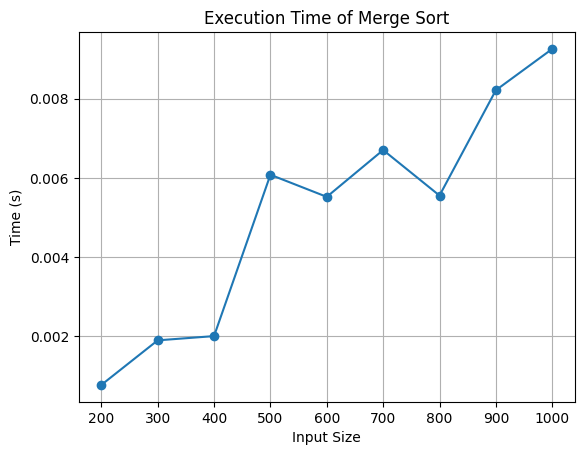

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import timeit

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

# Function to generate random arrays of varying sizes
def generate_arrays(start, stop, step):
    return [np.random.randint(0, 1000, size=n) for n in range(start, stop, step)]

# Analyze the execution time
sizes = range(100, 1100, 100)
times = []

for size in sizes:
    arrays = generate_arrays(100, size, 100)
    avg_time = np.mean([timeit.timeit(lambda: merge_sort(arr), number=1) for arr in arrays])
    times.append(avg_time)

# Plotting the execution time
plt.plot(sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Execution Time of Merge Sort')
plt.grid(True)
plt.show()


#Recurrences: Expansion Solution, Induction Verification, Master Theorem

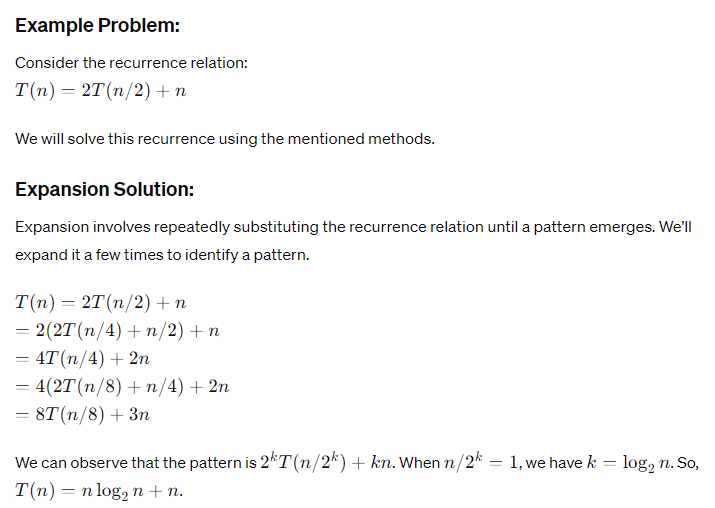

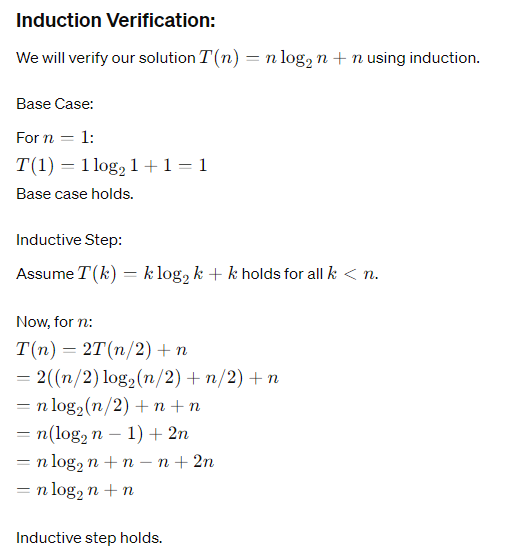

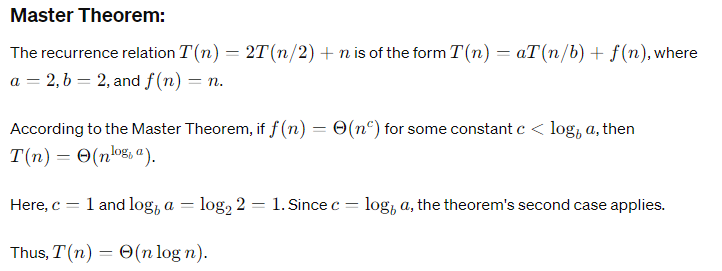

In [ ]:
def recurrence_expansion(n):
    if n == 1:
        return 1
    else:
        return 2 * recurrence_expansion(n // 2) + n

def recurrence_master_theorem(n):
    return n * np.log2(n)

# Test the solutions
n = 16
print("Expansion Solution:", recurrence_expansion(n))
print("Master Theorem Solution:", recurrence_master_theorem(n))


Expansion Solution: 80
Master Theorem Solution: 64.0


#Maximum Subarray Problem

The Maximum Subarray Problem is a classic problem where the task is to find the contiguous subarray within a one-dimensional array that has the largest sum.



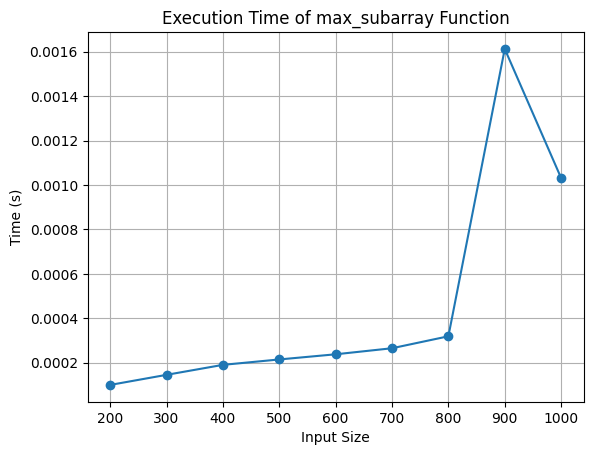

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def max_subarray(arr):
    max_ending_here = max_so_far = arr[0]
    for num in arr[1:]:
        max_ending_here = max(num, max_ending_here + num)
        max_so_far = max(max_so_far, max_ending_here)
    return max_so_far

# Function to generate random arrays of varying sizes
def generate_arrays(start, stop, step):
    return [np.random.randint(-1000, 1000, size=n) for n in range(start, stop, step)]

# Analyze the execution time
sizes = range(100, 1100, 100)
times = []

for size in sizes:
    arrays = generate_arrays(100, size, 100)
    avg_time = np.mean([timeit.timeit(lambda: max_subarray(arr), number=1) for arr in arrays])
    times.append(avg_time)

# Plotting the execution time
plt.plot(sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Execution Time of max_subarray Function')
plt.grid(True)
plt.show()

#Multiplication of Natural Numbers (Karatsuba Algorithm)

The Karatsuba Algorithm is a fast multiplication algorithm that uses the Divide and Conquer approach to multiply two numbers. It reduces the number of multiplications required compared to the standard multiplication algorithm.



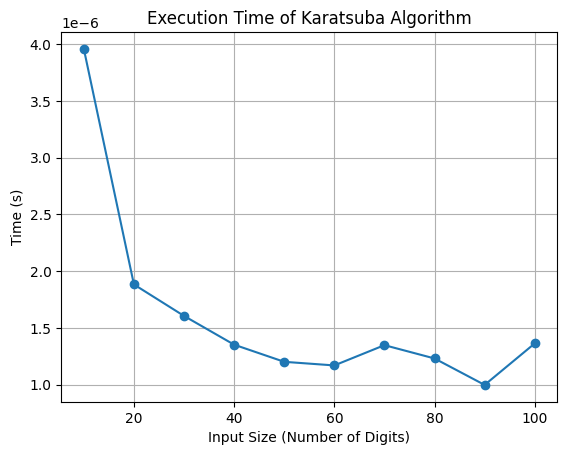

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def karatsuba(x, y):
    if x < 10 or y < 10:
        return x * y

    n = max(len(str(x)), len(str(y)))
    m = n // 2

    high1, low1 = divmod(x, 10 ** m)
    high2, low2 = divmod(y, 10 ** m)

    z0 = karatsuba(low1, low2)
    z1 = karatsuba((low1 + high1), (low2 + high2))
    z2 = karatsuba(high1, high2)

    return (z2 * 10 ** (2 * m)) + ((z1 - z2 - z0) * 10 ** m) + z0

# Function to generate random numbers of varying sizes
def generate_numbers(start, stop, step):
    return [(np.random.randint(10 ** (start - 1), 10 ** start), np.random.randint(10 ** (start - 1), 10 ** start)) for n in range(start, stop, step)]

# Analyze the execution time
sizes = range(10, 101, 10)
times = []

for size in sizes:
    numbers = generate_numbers(1, size, 10)
    avg_time = np.mean([timeit.timeit(lambda: karatsuba(x, y), number=1) for x, y in numbers])
    times.append(avg_time)

# Plotting the execution time
plt.plot(sizes, times, marker='o')
plt.xlabel('Input Size (Number of Digits)')
plt.ylabel('Time (s)')
plt.title('Execution Time of Karatsuba Algorithm')
plt.grid(True)
plt.show()

# Counting Inversions

Counting Inversions is a problem where the goal is to count the number of inversions in an array. An inversion occurs if there are two elements arr[i] and arr[j] such that i < j but arr[i] > arr[j].

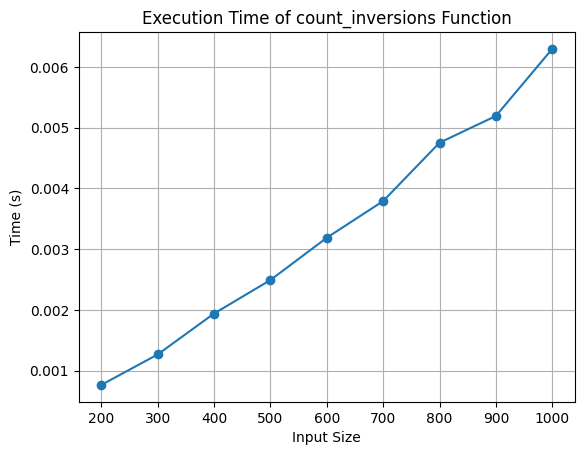

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def count_inversions(arr):
    def merge(arr, temp_arr, left, mid, right):
        i = left
        j = mid
        k = left
        inv_count = 0

        while i < mid and j <= right:
            if arr[i] <= arr[j]:
                temp_arr[k] = arr[i]
                i += 1
            else:
                temp_arr[k] = arr[j]
                j += 1
                inv_count += (mid - i)
            k += 1

        while i < mid:
            temp_arr[k] = arr[i]
            i += 1
            k += 1

        while j <= right:
            temp_arr[k] = arr[j]
            j += 1
            k += 1

        for i in range(left, right + 1):
            arr[i] = temp_arr[i]

        return inv_count

    def _count_inversions(arr, temp_arr, left, right):
        inv_count = 0
        if left < right:
            mid = (left + right) // 2
            inv_count += _count_inversions(arr, temp_arr, left, mid)
            inv_count += _count_inversions(arr, temp_arr, mid + 1, right)
            inv_count += merge(arr, temp_arr, left, mid + 1, right)
        return inv_count

    n = len(arr)
    temp_arr = [0] * n
    return _count_inversions(arr, temp_arr, 0, n - 1)

# Function to generate random arrays of varying sizes
def generate_arrays(start, stop, step):
    return [np.random.randint(0, 1000, size=n) for n in range(start, stop, step)]

# Analyze the execution time
sizes = range(100, 1100, 100)
times = []

for size in sizes:
    arrays = generate_arrays(100, size, 100)
    avg_time = np.mean([timeit.timeit(lambda: count_inversions(arr), number=1) for arr in arrays])
    times.append(avg_time)

# Plotting the execution time
plt.plot(sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Execution Time of count_inversions Function')
plt.grid(True)
plt.show()